# Setup

Please note that all data files must be in the same directory as this notebook to be run.

In [28]:
# print the current directory
!pwd

/home/vcm


## First-Time Setup

The following commands need to be run in a terminal, they cannot be run in the notebook interperter. Google Collab has difficulty running `autogluon`, and it is reccomended to run the package on Linux. Otherwise, refer to the support documents [here](https://auto.gluon.ai/stable/install.html).

## Variable Initialization and Data Import

In [3]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/vcm/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#A partial dataset used for training covariates.
df = pd.read_csv("NationalDataPartial.csv")
df.head()
#Importing of the "extended" covariate dataset
covars = TimeSeriesDataFrame(pd.read_csv("NationalDataCovariates.csv"))

In [5]:
covariate_train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
covariate_train_data.head()

ATHOME  NOTATHOME  TOTALTRIPS    LESS1mi      1-3mi  \
item_id  timestamp                                                           
National 2019-01-01  77433867  248733553   897784368  241667151  234284795   
         2019-01-02  61305201  264862219  1139452281  291276735  285887315   
         2019-01-03  63050480  263116940  1162752684  296375014  290074425   
         2019-01-04  61803652  264363768  1181953829  293159631  295643296   
         2019-01-05  64389745  261777675  1180476620  295459014  304168709   

                         3-5mi     5-10mi    10-25mi   25-50mi  50-100mi  \
item_id  timestamp                                                         
National 2019-01-01  108078903  129670778  116904343  40432062  15686639   
         2019-01-02  138039296  171637514  167412698  56148976  17739183   
         2019-01-03  140771581  175775410  172027487  57632422  18366626   
         2019-01-04  145251819  181324645  176144493  58761592  19315785   
         2019-01-05  148540651  180941769  165239790  54842134  19363939   

                     100-250mi  250-500mi  MORE500mi  week  month  isHoliday  \
item_id  timestamp                                                             
National 2019-01-01    7525563    1806022    1728112     0      1          1   
         2019-01-02    7817044    1962301    1531219     0      1          0   
         2019-01-03    8124548    2038099    1567072     0      1          0   
         2019-01-04    8687318    2096065    1569185     0      1          0   
         2019-01-05    8490791    1991159    1438664     0      1          0   

                     isWeekend  
item_id  timestamp              
National 2019-01-01          0  
         2019-01-02          0  
         2019-01-03          0  
         2019-01-04          0  
         2019-01-05          1

In [6]:
#Importing of full dataset for regular training.
fulldf = pd.read_csv("NationalDataFull.csv")
fulldf.head()

,item_id,timestamp,ATHOME,NOTATHOME,TOTALTRIPS,LESS1mi,1-3mi,3-5mi,5-10mi,10-25mi,25-50mi,50-100mi,100-250mi,250-500mi,MORE500mi,week,month,isHoliday,isWeekend
0,National,2019-01-01,77433867,248733553,897784368,241667151,234284795,108078903,129670778,116904343,40432062,15686639,7525563,1806022,1728112,0,1,1,0
1,National,2019-01-02,61305201,264862219,1139452281,291276735,285887315,138039296,171637514,167412698,56148976,17739183,7817044,1962301,1531219,0,1,0,0
2,National,2019-01-03,63050480,263116940,1162752684,296375014,290074425,140771581,175775410,172027487,57632422,18366626,8124548,2038099,1567072,0,1,0,0
3,National,2019-01-04,61803652,264363768,1181953829,293159631,295643296,145251819,181324645,176144493,58761592,19315785,8687318,2096065,1569185,0,1,0,0
4,National,2019-01-05,64389745,261777675,1180476620,295459014,304168709,148540651,180941769,165239790,54842134,19363939,8490791,1991159,1438664,0,1,0,1


In [7]:
#Conversion into a Time Series Dataframe
train_data = TimeSeriesDataFrame.from_data_frame(
    fulldf,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data.head()

ATHOME  NOTATHOME  TOTALTRIPS    LESS1mi      1-3mi  \
item_id  timestamp                                                           
National 2019-01-01  77433867  248733553   897784368  241667151  234284795   
         2019-01-02  61305201  264862219  1139452281  291276735  285887315   
         2019-01-03  63050480  263116940  1162752684  296375014  290074425   
         2019-01-04  61803652  264363768  1181953829  293159631  295643296   
         2019-01-05  64389745  261777675  1180476620  295459014  304168709   

                         3-5mi     5-10mi    10-25mi   25-50mi  50-100mi  \
item_id  timestamp                                                         
National 2019-01-01  108078903  129670778  116904343  40432062  15686639   
         2019-01-02  138039296  171637514  167412698  56148976  17739183   
         2019-01-03  140771581  175775410  172027487  57632422  18366626   
         2019-01-04  145251819  181324645  176144493  58761592  19315785   
         2019-01-05  148540651  180941769  165239790  54842134  19363939   

                     100-250mi  250-500mi  MORE500mi  week  month  isHoliday  \
item_id  timestamp                                                             
National 2019-01-01    7525563    1806022    1728112     0      1          1   
         2019-01-02    7817044    1962301    1531219     0      1          0   
         2019-01-03    8124548    2038099    1567072     0      1          0   
         2019-01-04    8687318    2096065    1569185     0      1          0   
         2019-01-05    8490791    1991159    1438664     0      1          0   

                     isWeekend  
item_id  timestamp              
National 2019-01-01          0  
         2019-01-02          0  
         2019-01-03          0  
         2019-01-04          0  
         2019-01-05          1

# Predictions with Covariates

## Train Models
This code sets up `prediction_length` and how we want to evaluate the performnce of the models using `eval_metric`. Our known covariates are also imported with the model constructor.

In [8]:
Cpredictor = TimeSeriesPredictor(
    prediction_length=60,
    path="autogluon-traffic-partial-prediction-covariate",
    target="TOTALTRIPS",
    eval_metric="sMAPE",
    known_covariates_names=["week", "month", "isHoliday", "isWeekend"],
)

Cpredictor.fit(
    train_data,
    time_limit=120 * 10,
    presets="best_quality",
    #hyperparameters={
        #'SeasonalNaive': {}, 
        #'ETS': {}, 
        #'Theta': {}, 
        #'ARIMA': {},
        #'AutoGluonTabular': {},
        #'SimpleFeedForward': {},
    #}
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'sMAPE',
 'hyperparameter_tune_kwargs': {'num_trials': 10,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'prediction_length': 60,
 'random_seed': None,
 'target': 'TOTALTRIPS',
 'time_limit': 1200}
Provided training data set with 901 rows, 1 items (item = single time series). Average time series length is 901.0.
Training artifacts will be saved to: /home/vcm/autogluon-traffic-partial-prediction-covariate
AutoGluon will save models to autogluon-traffic-partial-prediction-covariate/
AutoGluon will gauge predictive performance using evaluation metric: 'sMAPE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.
Pro

## Generate Predictions
Our known covariates must be provided for this future data to generate predictions. 

In [9]:
Cpredictions = Cpredictor.predict(
    covariate_train_data,
    known_covariates=covars
    )

Cpredictions.head()

Provided columns ['LESS1mi', '25-50mi', 'NOTATHOME', '10-25mi', '250-500mi', '1-3mi', '3-5mi', '50-100mi', 'ATHOME', 'MORE500mi', '5-10mi', '100-250mi'] in data will be ignored.
Provided columns ['LESS1mi', '25-50mi', 'NOTATHOME', '10-25mi', '250-500mi', '1-3mi', '3-5mi', '50-100mi', 'ATHOME', 'MORE500mi', '5-10mi', '100-250mi'] in known_covariates will be ignored.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean           0.1           0.2           0.3  \
item_id  timestamp                                                            
National 2021-04-21  1.370577e+09  1.265748e+09  1.302026e+09  1.326209e+09   
         2021-04-22  1.366818e+09  1.258488e+09  1.294021e+09  1.321733e+09   
         2021-04-23  1.395521e+09  1.280718e+09  1.322300e+09  1.348470e+09   
         2021-04-24  1.316841e+09  1.196829e+09  1.245884e+09  1.275681e+09   
         2021-04-25  1.262247e+09  1.135116e+09  1.185572e+09  1.218018e+09   

                              0.4           0.5           0.6           0.7  \
item_id  timestamp                                                            
National 2021-04-21  1.345265e+09  1.363985e+09  1.387112e+09  1.408324e+09   
         2021-04-22  1.344211e+09  1.367424e+09  1.385837e+09  1.411141e+09   
         2021-04-23  1.374601e+09  1.397439e+09  1.420418e+09  1.447427e+09   
         2021-04-24  1.297309e+09  1.316315e+09  1.338881e+09  1.359084e+09   
         2021-04-25  1.244366e+09  1.263986e+09  1.282232e+09  1.312297e+09   

                              0.8           0.9  
item_id  timestamp                               
National 2021-04-21  1.438380e+09  1.477222e+09  
         2021-04-22  1.439633e+09  1.481993e+09  
         2021-04-23  1.471529e+09  1.500982e+09  
         2021-04-24  1.391542e+09  1.428705e+09  
         2021-04-25  1.335474e+09  1.381023e+09

## Generate Figures
- Generate graph of predicted versus actual values
- Create a ranking of models based on the measurment criteria chosen earier
    - Measures how well the models fit to new data

Loaded data from: NationalDataFull.csv | Columns = 19 / 19 | Rows = 901 -> 901


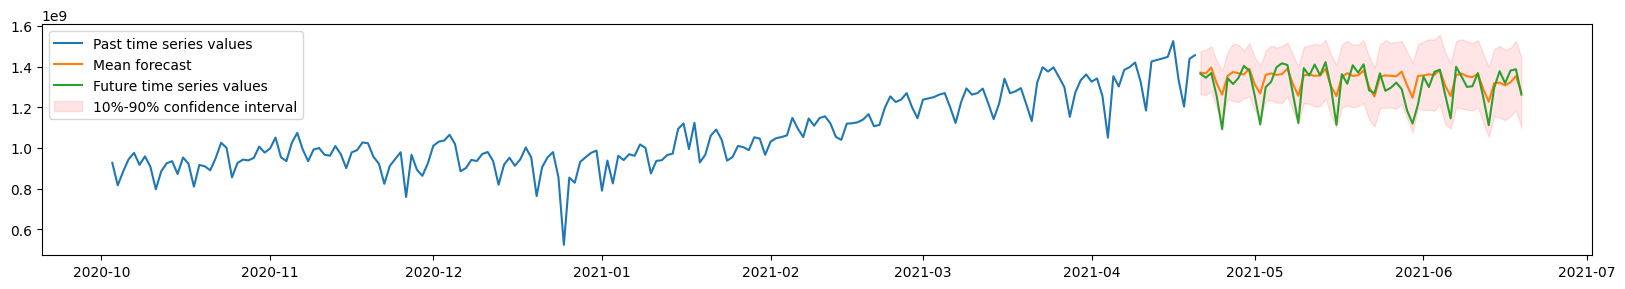

In [11]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("NationalDataFull.csv")

plt.figure(figsize=(20, 3))

item_id = "National"
y_past = covariate_train_data.loc[item_id]["TOTALTRIPS"]
y_pred = Cpredictions.loc[item_id]
y_test = test_data.loc[item_id]["TOTALTRIPS"][-60:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [12]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
Cpredictor.leaderboard(test_data, silent=True)

Provided columns ['LESS1mi', '25-50mi', 'NOTATHOME', '10-25mi', '250-500mi', '1-3mi', '3-5mi', '50-100mi', 'ATHOME', 'MORE500mi', '5-10mi', '100-250mi'] in data will be ignored.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.038874,-0.038870,0.292443,3.095007,6.107385,19
1,SimpleFeedForward/T3,-0.044563,-0.044563,0.021152,0.018851,37.261412,18
2,DeepAR/T1,-0.052986,-0.054800,0.270956,0.265902,171.963756,15
3,SimpleFeedForward/T2,-0.064123,-0.064123,0.032230,0.019892,60.687088,17
4,Theta/T2,-0.064989,-0.064989,0.012824,0.095638,0.000172,8
5,SimpleFeedForward/T1,-0.065108,-0.065108,0.024112,0.019155,39.258952,16
6,ETS/T3,-0.068542,-0.068542,0.012867,0.035554,0.000186,5
7,ETS/T4,-0.070795,-0.070795,0.012867,0.074299,0.000176,6
8,SeasonalNaive,-0.074289,-0.074289,0.013229,2.810255,0.001252,2
9,Theta/T1,-0.075545,-0.075545,0.012917,0.098569,0.000177,7


# Predictions without Covariates

## Train Models

In [11]:
predictor = TimeSeriesPredictor(
    prediction_length=30,
    path="autogluon-traffic-prediction",
    target="TOTALTRIPS",
    eval_metric="sMAPE",
)
predictor.fit(
    train_data,
    time_limit=60 * 120,
    presets="best_quality",
    #hyperparameters={
        #'SeasonalNaive': {}, 
        #'ETS': {}, 
        #'Theta': {}, 
        #'ARIMA': {},
        #'AutoGluonTabular': {},
        #'SimpleFeedForward': {},
    #}
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'sMAPE',
 'hyperparameter_tune_kwargs': {'num_trials': 10,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'prediction_length': 30,
 'random_seed': None,
 'target': 'TOTALTRIPS',
 'time_limit': 7200}
Provided training data set with 901 rows, 1 items (item = single time series). Average time series length is 901.0.
Training artifacts will be saved to: /home/vcm/autogluon-traffic-partial-prediction
AutoGluon will save models to autogluon-traffic-partial-prediction/
AutoGluon will gauge predictive performance using evaluation metric: 'sMAPE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.
Provided columns ['5-10

## Generate Predictions
Since no data was withheld for this model, these predictions represent future values, and there is no comparison metric to "real" data.

In [27]:
predictions = predictor.predict(
    train_data,
    )
predictions.head()

Provided columns ['5-10mi', '250-500mi', '25-50mi', 'isHoliday', 'LESS1mi', 'month', 'week', '50-100mi', 'isWeekend', 'ATHOME', '10-25mi', '3-5mi', 'NOTATHOME', '100-250mi', 'MORE500mi', '1-3mi'] in data will be ignored.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean           0.1           0.2           0.3  \
item_id  timestamp                                                            
National 2021-06-20  1.173876e+09  1.082802e+09  1.114973e+09  1.137214e+09   
         2021-06-21  1.306910e+09  1.215309e+09  1.246451e+09  1.269620e+09   
         2021-06-22  1.324931e+09  1.232880e+09  1.265694e+09  1.288022e+09   
         2021-06-23  1.293642e+09  1.200111e+09  1.232383e+09  1.255784e+09   
         2021-06-24  1.340861e+09  1.250437e+09  1.281677e+09  1.304575e+09   

                              0.4           0.5           0.6           0.7  \
item_id  timestamp                                                            
National 2021-06-20  1.156047e+09  1.173853e+09  1.191563e+09  1.210401e+09   
         2021-06-21  1.288913e+09  1.307213e+09  1.325336e+09  1.344054e+09   
         2021-06-22  1.307443e+09  1.325051e+09  1.342515e+09  1.360980e+09   
         2021-06-23  1.275859e+09  1.294251e+09  1.312009e+09  1.331432e+09   
         2021-06-24  1.323654e+09  1.341077e+09  1.358682e+09  1.377584e+09   

                              0.8           0.9  
item_id  timestamp                               
National 2021-06-20  1.232953e+09  1.264803e+09  
         2021-06-21  1.366776e+09  1.398292e+09  
         2021-06-22  1.384393e+09  1.416233e+09  
         2021-06-23  1.354530e+09  1.386825e+09  
         2021-06-24  1.400000e+09  1.430736e+09

## Generate Figures

Loaded data from: NationalDataFull.csv | Columns = 19 / 19 | Rows = 901 -> 901


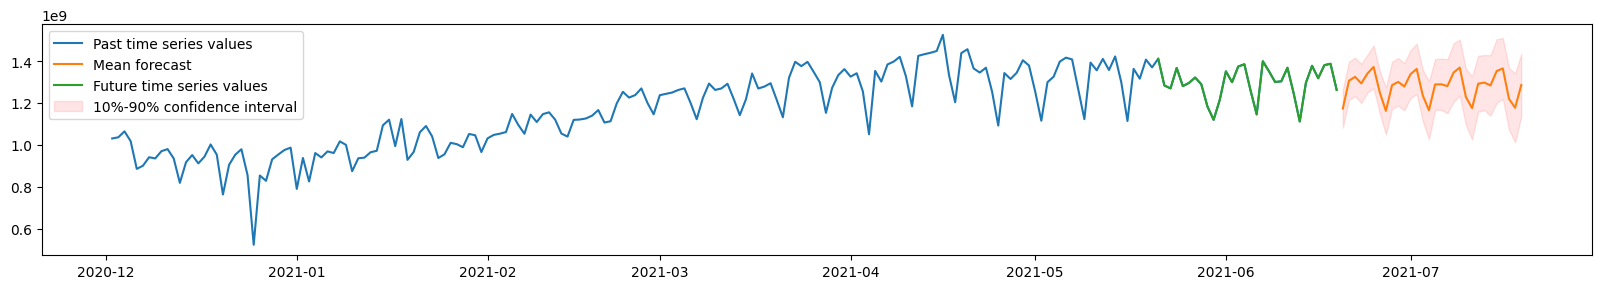

In [13]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("NationalDataFull.csv")

plt.figure(figsize=(20, 3))

item_id = "National"
y_past = train_data.loc[item_id]["TOTALTRIPS"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["TOTALTRIPS"][-30:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [14]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
leaderboard = predictor.leaderboard(test_data, silent=True)
leaderboard

Provided columns ['5-10mi', '250-500mi', '25-50mi', 'isHoliday', 'LESS1mi', 'month', 'week', '50-100mi', 'isWeekend', 'ATHOME', '10-25mi', '3-5mi', 'NOTATHOME', '100-250mi', 'MORE500mi', '1-3mi'] in data will be ignored.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.029624,-0.029543,0.177750,0.265617,6.615598,20
1,SimpleFeedForward/T3,-0.030183,-0.030183,0.024992,0.015760,34.528382,19
2,ETS/T4,-0.032749,-0.032749,0.010129,0.077244,0.000190,6
3,DeepAR/T2,-0.036539,-0.036413,0.134900,0.156837,418.757932,16
4,SimpleFeedForward/T1,-0.036745,-0.036745,0.016569,0.015289,36.489034,17
5,SimpleFeedForward/T2,-0.036929,-0.036929,0.018569,0.015775,37.193161,18
6,ETS/T1,-0.041162,-0.041162,0.010151,0.094043,0.000221,3
7,DeepAR/T1,-0.041492,-0.040888,0.127794,0.118750,375.973176,15
8,SeasonalNaive,-0.042764,-0.042764,0.010586,2.753338,0.001073,2
9,Theta/T1,-0.046442,-0.046442,0.010081,0.111023,0.000164,7


### In Depth Model Comparison
The top 9 models here are graphed and compared. Without any data from the predicted period, it is difficult to properly assess the performance of each model.

Provided columns ['5-10mi', '250-500mi', '25-50mi', 'isHoliday', 'LESS1mi', 'month', 'week', '50-100mi', 'isWeekend', 'ATHOME', '10-25mi', '3-5mi', 'NOTATHOME', '100-250mi', 'MORE500mi', '1-3mi'] in data will be ignored.
Loaded data from: NationalDataFull.csv | Columns = 19 / 19 | Rows = 901 -> 901
Provided columns ['5-10mi', '250-500mi', '25-50mi', 'isHoliday', 'LESS1mi', 'month', 'week', '50-100mi', 'isWeekend', 'ATHOME', '10-25mi', '3-5mi', 'NOTATHOME', '100-250mi', 'MORE500mi', '1-3mi'] in data will be ignored.
Loaded data from: NationalDataFull.csv | Columns = 19 / 19 | Rows = 901 -> 901
Provided columns ['5-10mi', '250-500mi', '25-50mi', 'isHoliday', 'LESS1mi', 'month', 'week', '50-100mi', 'isWeekend', 'ATHOME', '10-25mi', '3-5mi', 'NOTATHOME', '100-250mi', 'MORE500mi', '1-3mi'] in data will be ignored.
Loaded data from: NationalDataFull.csv | Columns = 19 / 19 | Rows = 901 -> 901
Provided columns ['5-10mi', '250-500mi', '25-50mi', 'isHoliday', 'LESS1mi', 'month', 'week', '50-100

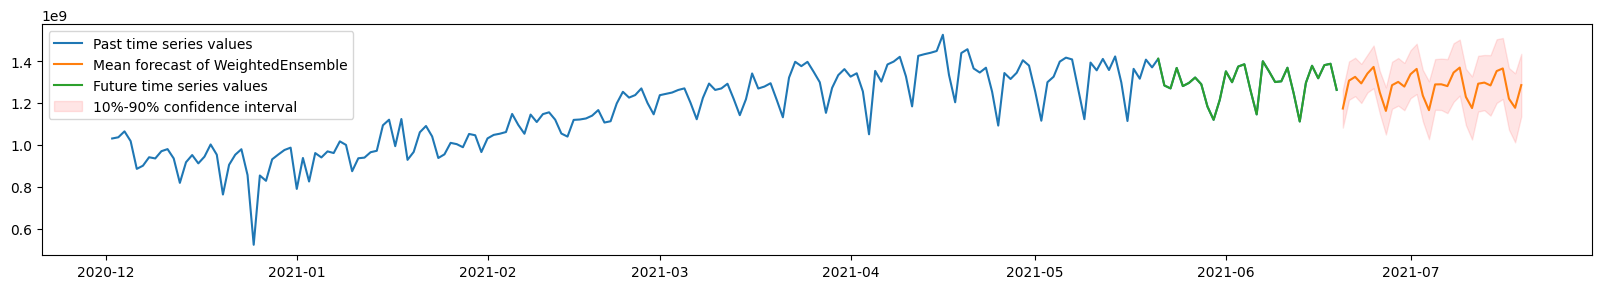

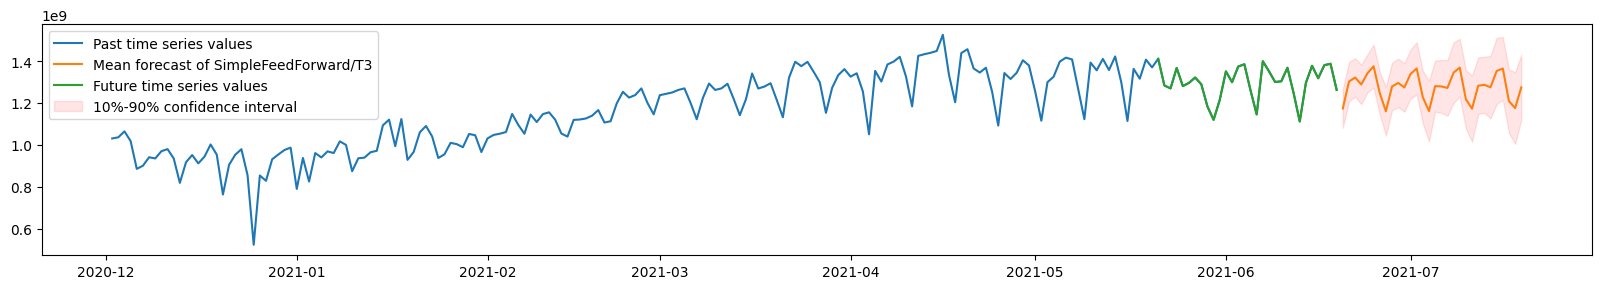

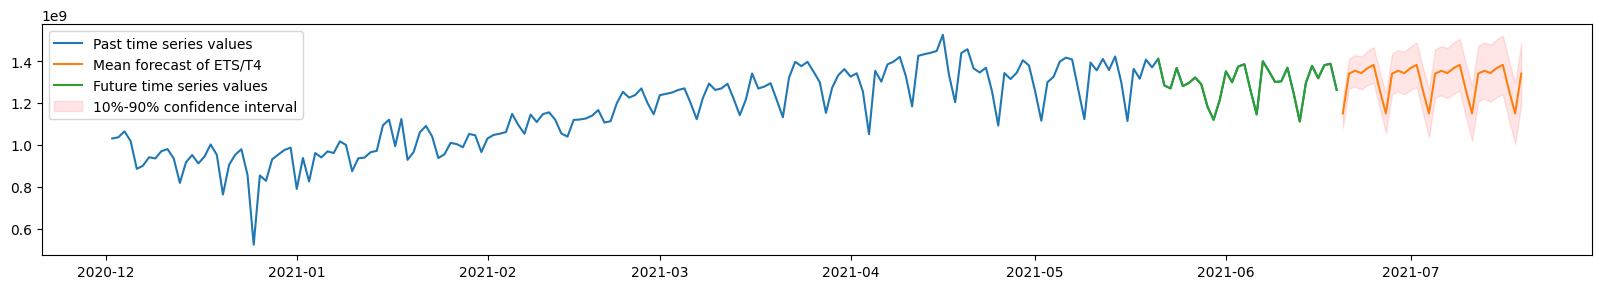

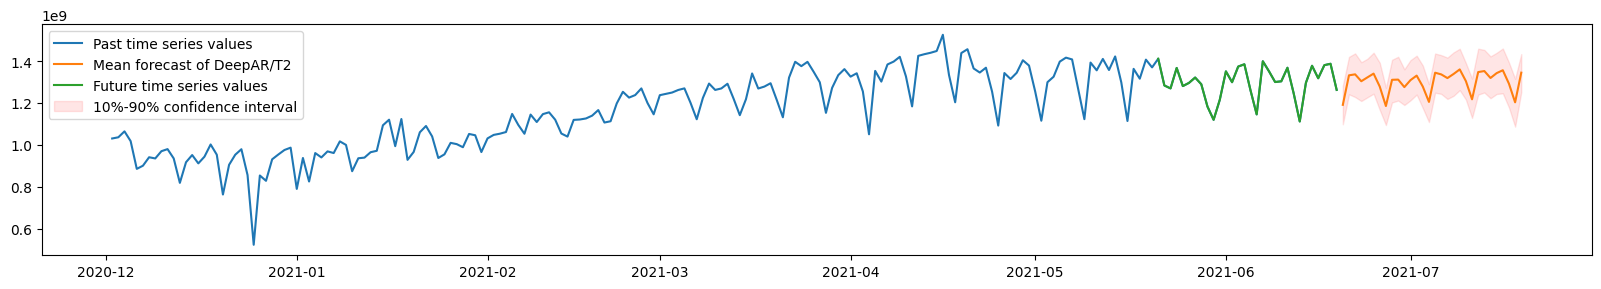

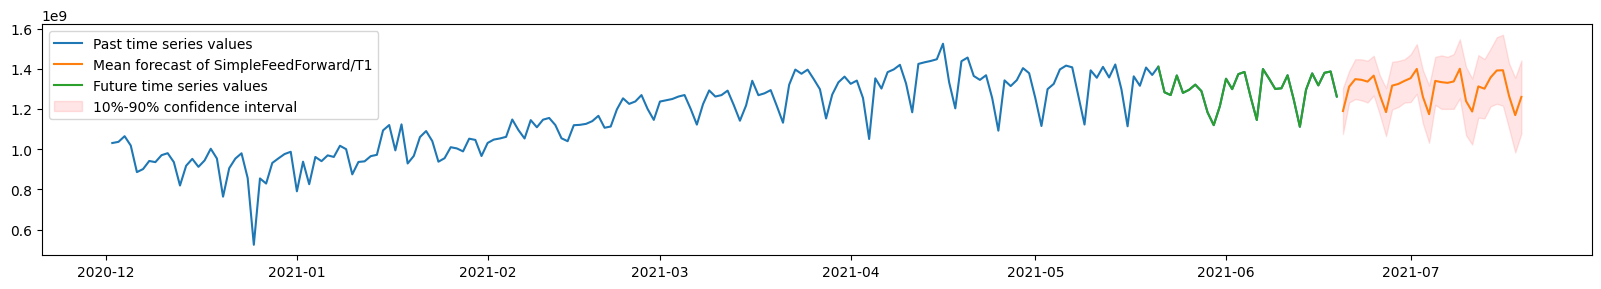

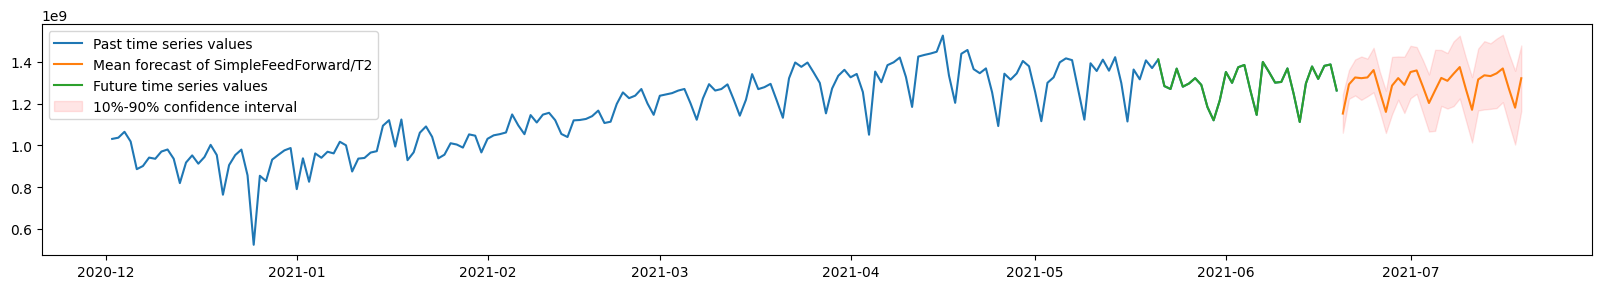

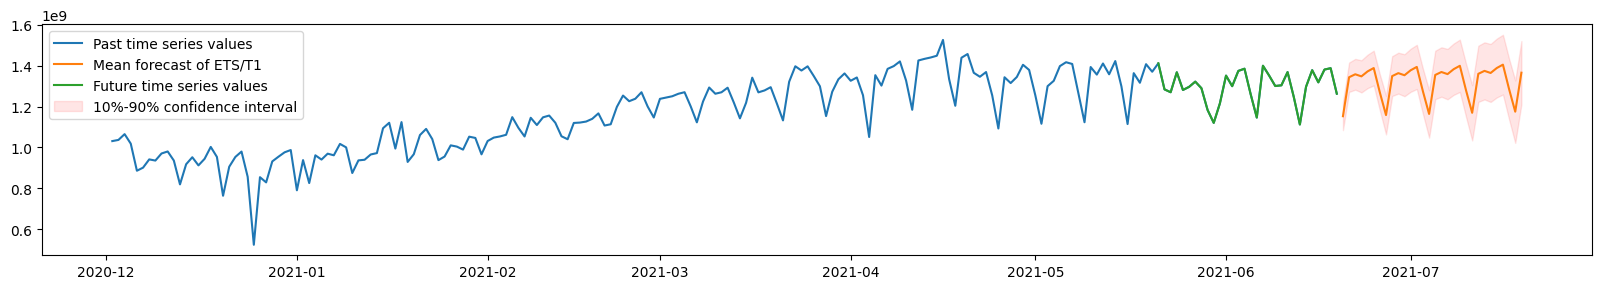

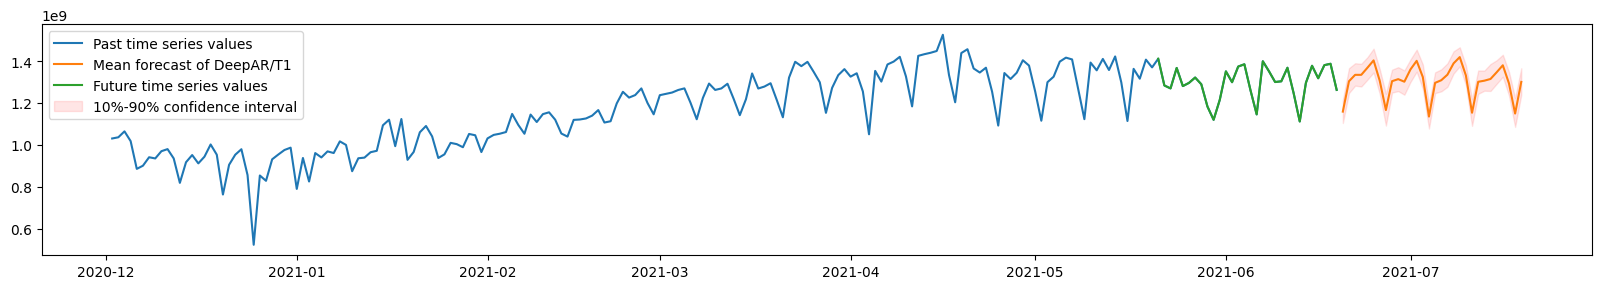

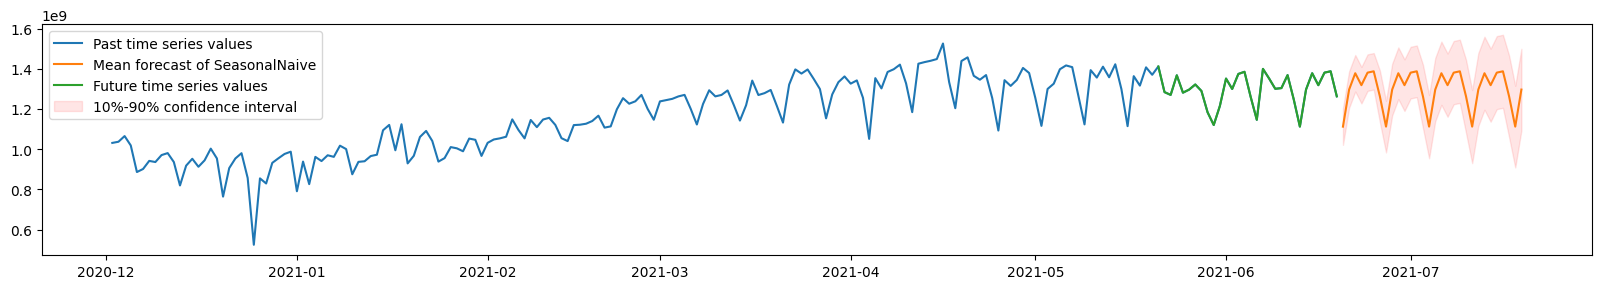

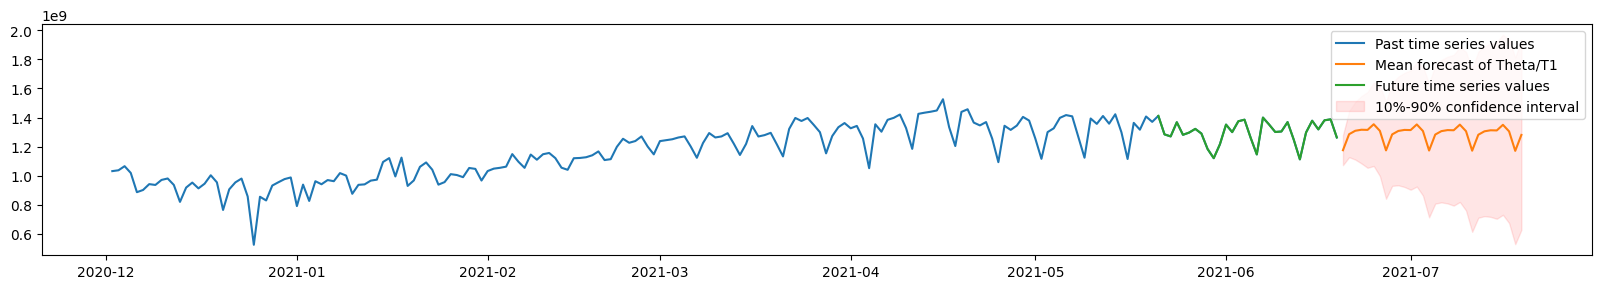

In [21]:
import matplotlib.pyplot as plt

topModels = leaderboard["model"].values.tolist()
for x in range(10): topModels.pop()
for x in topModels:
    
    predictions = predictor.predict(
        train_data,
        model=x,
        )
    
    # TimeSeriesDataFrame can also be loaded directly from a file
    test_data = TimeSeriesDataFrame.from_path("NationalDataFull.csv")

    plt.figure(figsize=(20, 3))

    item_id = "National"
    y_past = train_data.loc[item_id]["TOTALTRIPS"]
    y_pred = predictions.loc[item_id]
    y_test = test_data.loc[item_id]["TOTALTRIPS"][-30:]

    plt.plot(y_past[-200:], label="Past time series values")
    plt.plot(y_pred["mean"], label="Mean forecast of " + str(x))
    plt.plot(y_test, label="Future time series values")

    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
    )
    plt.legend();